In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
data = pd.read_csv('Data_clean.csv')
print(data.columns)

Index(['accident_index', 'speed_limit', 'urban_or_rural_area',
       'local_authority_name', 'accident_count', 'traffic_flow',
       'accident_rate', 'population_density', 'mean_income_of_tax_payers',
       'total_road_length', 'Inland_Area', 'Road_Network_Density',
       'Signal_Count', 'Driving_Distance'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22883 entries, 0 to 22882
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accident_index             22883 non-null  float64
 1   speed_limit                22883 non-null  int64  
 2   urban_or_rural_area        22883 non-null  int64  
 3   local_authority_name       22883 non-null  object 
 4   accident_count             22883 non-null  int64  
 5   traffic_flow               22883 non-null  int64  
 6   accident_rate              22883 non-null  float64
 7   population_density         22883 non-null  float64
 8   mean_income_of_tax_payers  22236 non-null  float64
 9   total_road_length          22883 non-null  float64
 10  Inland_Area                22883 non-null  float64
 11  Road_Network_Density       22883 non-null  float64
 12  Signal_Count               22711 non-null  float64
 13  Driving_Distance           22883 non-null  int

In [6]:
# 删除不需要的列
columns_to_drop = ['accident_index', 'speed_limit', 'urban_or_rural_area', 'total_road_length', 'Inland_Area']
df_cleaned = data.drop(columns=columns_to_drop)

# 按 'local_authority_name' 去除重复行，保留每个区域的唯一记录
df_unique = df_cleaned.drop_duplicates(subset='local_authority_name')

# 查看结果
print(df_unique.head())

      local_authority_name  accident_count  traffic_flow  accident_rate  \
0     Barking and Dagenham             442        332152       0.001331   
442                 Barnet             829       1421345       0.000583   
1271                Bexley             395        817061       0.000483   
1666                 Brent             934        701496       0.001331   
2600               Bromley             598        631376       0.000947   

      population_density  mean_income_of_tax_payers  Road_Network_Density  \
0                 6286.4                    31800.0              5.896200   
442               4821.9                    59100.0              5.486005   
1271              4295.6                    38000.0              5.645334   
1666              8112.3                    44100.0              6.668517   
2600              2299.4                    54500.0              3.781264   

      Signal_Count  Driving_Distance  
0            454.0               634  
442     

In [7]:
# 使用 .loc 进行操作
df_unique.loc[:, 'accident_rate_percentage'] = df_unique['accident_rate'] * 100

/tmp/ipykernel_1185/2418590600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.loc[:, 'accident_rate_percentage'] = df_unique['accident_rate'] * 100


In [8]:
df_unique = df_unique.drop(columns = ['local_authority_name','accident_rate','accident_count'])

In [9]:
df_unique = df_unique.dropna()

In [10]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 21653
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   traffic_flow               30 non-null     int64  
 1   population_density         30 non-null     float64
 2   mean_income_of_tax_payers  30 non-null     float64
 3   Road_Network_Density       30 non-null     float64
 4   Signal_Count               30 non-null     float64
 5   Driving_Distance           30 non-null     int64  
 6   accident_rate_percentage   30 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.9 KB


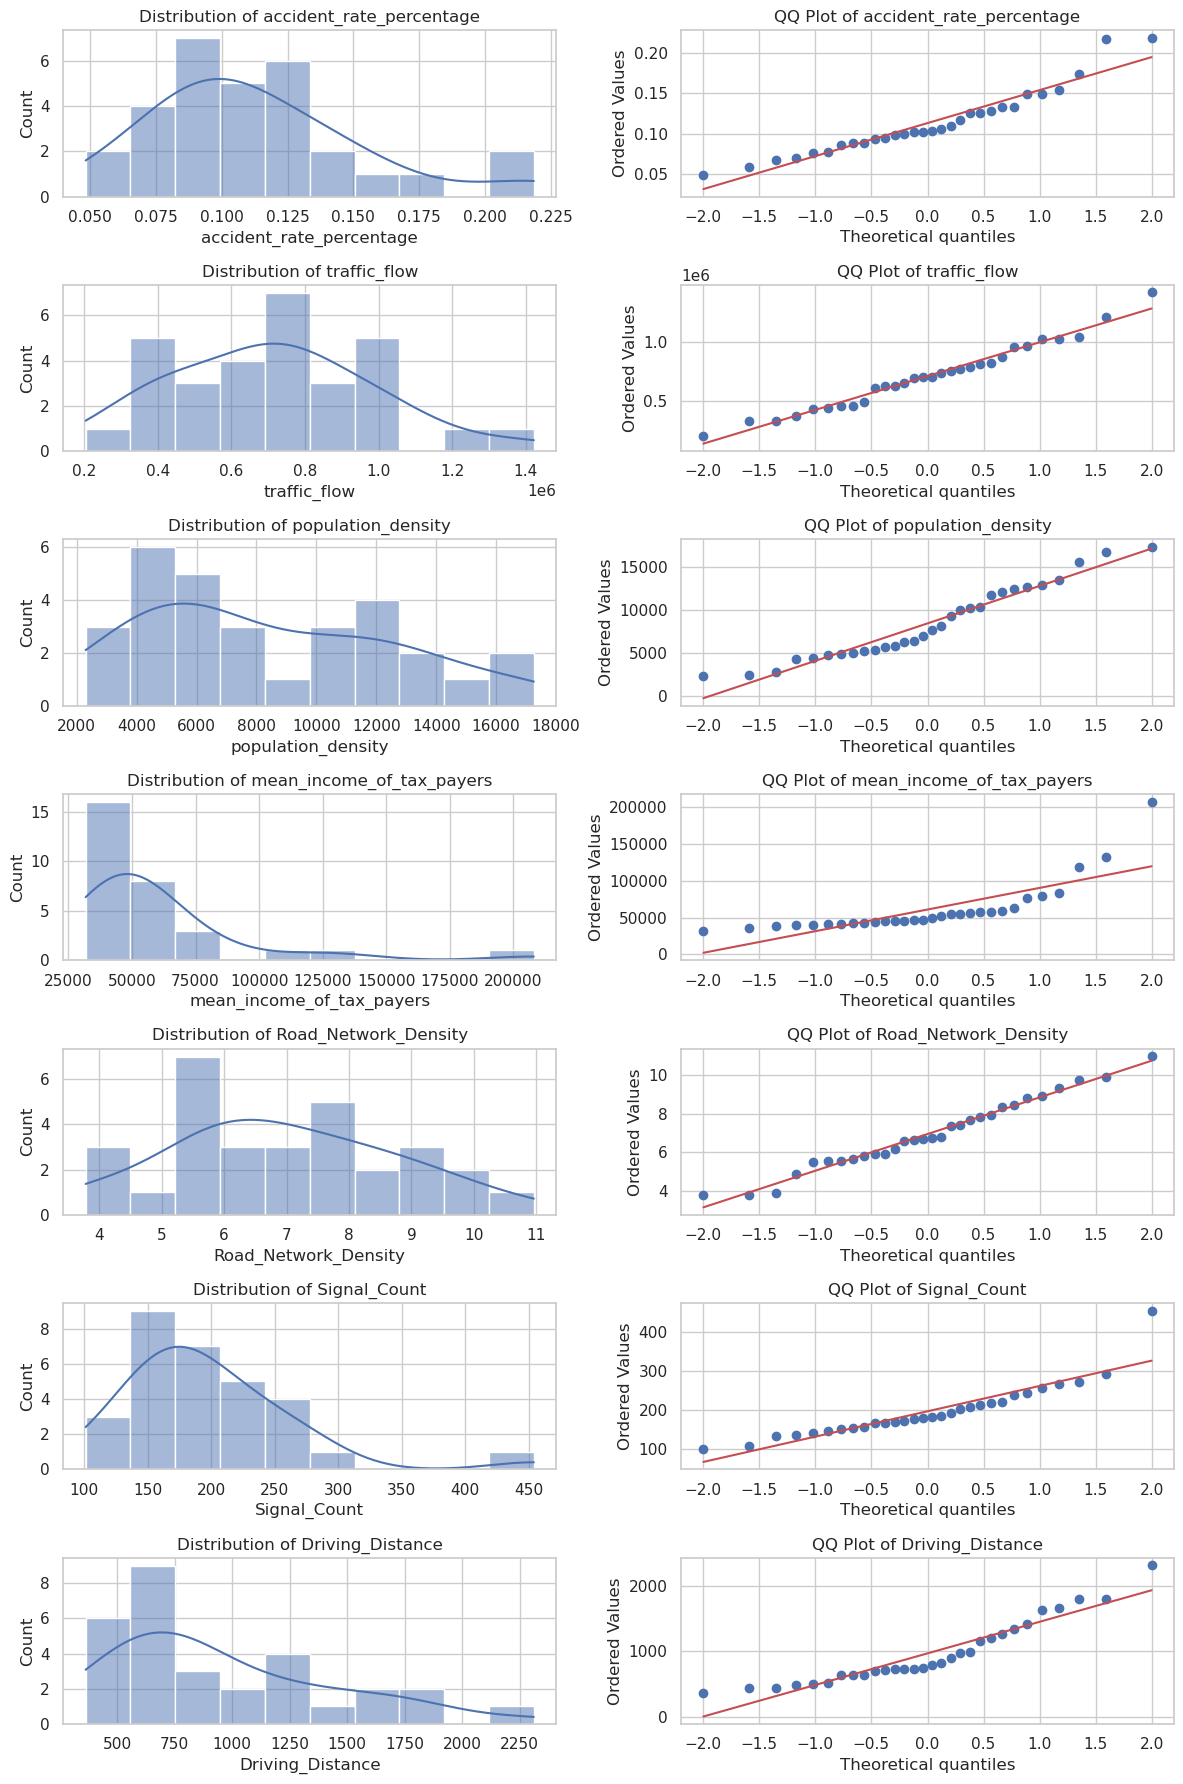

In [15]:
# 设置图形风格
sns.set(style="whitegrid")

# 设置图的大小
plt.figure(figsize=(12, 18))  # 增大高度以便显示所有7个变量

# 绘制各个变量的直方图和QQ图
variables = ['accident_rate_percentage', 'traffic_flow', 'population_density', 
             'mean_income_of_tax_payers', 'Road_Network_Density', 'Signal_Count', 'Driving_Distance']

# 循环绘制直方图和QQ图
for i, var in enumerate(variables, 1):
    plt.subplot(7, 2, 2*i - 1)  # 绘制每个变量的直方图
    sns.histplot(df_unique[var].dropna(), kde=True, bins=10)
    plt.title(f'Distribution of {var}')
    
    plt.subplot(7, 2, 2*i)  # 绘制每个变量的QQ图
    stats.probplot(df_unique[var].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}')

# 调整布局
plt.tight_layout()
plt.show()

In [16]:
import scipy.stats as stats

# 列出需要检验的变量
variables = ['accident_rate_percentage', 'traffic_flow', 'population_density', 
             'mean_income_of_tax_payers', 'Road_Network_Density', 'Signal_Count', 'Driving_Distance']

# 对每个变量进行Shapiro-Wilk检验
for var in variables:
    # 对数据进行Shapiro-Wilk检验
    stat, p_value = stats.shapiro(df_unique[var].dropna())
    
    # 打印检验结果
    print(f"{var} - Shapiro-Wilk检验统计量: {stat:.4f}, p值: {p_value:.4f}")
    
    # 检查p值，判断是否符合正态分布
    if p_value > 0.05:
        print(f"{var} 数据符合正态分布 (不能拒绝原假设)\n")
    else:
        print(f"{var} 数据不符合正态分布 (拒绝原假设)\n")

accident_rate_percentage - Shapiro-Wilk检验统计量: 0.9242, p值: 0.0345
accident_rate_percentage 数据不符合正态分布 (拒绝原假设)

traffic_flow - Shapiro-Wilk检验统计量: 0.9773, p值: 0.7490
traffic_flow 数据符合正态分布 (不能拒绝原假设)

population_density - Shapiro-Wilk检验统计量: 0.9392, p值: 0.0868
population_density 数据符合正态分布 (不能拒绝原假设)

mean_income_of_tax_payers - Shapiro-Wilk检验统计量: 0.6444, p值: 0.0000
mean_income_of_tax_payers 数据不符合正态分布 (拒绝原假设)

Road_Network_Density - Shapiro-Wilk检验统计量: 0.9775, p值: 0.7555
Road_Network_Density 数据符合正态分布 (不能拒绝原假设)

Signal_Count - Shapiro-Wilk检验统计量: 0.8562, p值: 0.0008
Signal_Count 数据不符合正态分布 (拒绝原假设)

Driving_Distance - Shapiro-Wilk检验统计量: 0.8952, p值: 0.0064
Driving_Distance 数据不符合正态分布 (拒绝原假设)



In [17]:
from scipy import stats

# 选择需要进行 Box-Cox 变换的变量
variables_to_transform = ['population_density', 'mean_income_of_tax_payers', 'Signal_Count', 'Driving_Distance']

# 对每个变量应用 Box-Cox 变换
for var in variables_to_transform:
    # 需要去除负值或零值，因为 Box-Cox 变换要求数据为正值
    # 可以考虑对数据进行平移或删除零值和负值
    data_cleaned = df_unique[var].dropna()

    if (data_cleaned <= 0).any():
        # 如果数据中存在非正数，Box-Cox 变换无法直接应用
        print(f"Warning: {var} contains non-positive values, skipping Box-Cox transformation.")
    else:
        # Box-Cox 变换
        transformed_data, lambda_value = stats.boxcox(data_cleaned)
        
        # 使用原始数据的索引，将变换后的数据与原数据合并
        df_unique.loc[data_cleaned.index, f'{var}_boxcox'] = transformed_data
        
        # 打印变换后的lambda值
        print(f"{var}的最佳Box-Cox λ值: {lambda_value}")
        
# 检查变换后的数据
df_unique[['population_density', 'population_density_boxcox', 'mean_income_of_tax_payers', 'mean_income_of_tax_payers_boxcox',
           'Signal_Count', 'Signal_Count_boxcox', 'Driving_Distance', 'Driving_Distance_boxcox']].head()

population_density的最佳Box-Cox λ值: 0.31387467937265784
mean_income_of_tax_payers的最佳Box-Cox λ值: -1.4912307301657401
Signal_Count的最佳Box-Cox λ值: -0.4427521693423551
Driving_Distance的最佳Box-Cox λ值: -0.24183222040109797


,population_density,population_density_boxcox,mean_income_of_tax_payers,mean_income_of_tax_payers_boxcox,Signal_Count,Signal_Count_boxcox,Driving_Distance,Driving_Distance_boxcox
0,6286.4,46.412217,31800.0,0.670587,454.0,2.108140,634,3.266437
442,4821.9,42.450549,59100.0,0.670587,243.0,2.060170,1666,3.447427
1271,4295.6,40.824678,38000.0,0.670587,169.0,2.025556,995,3.356137
1666,8112.3,50.545029,44100.0,0.670587,181.0,2.032528,970,3.351329
2600,2299.4,32.985755,54500.0,0.670587,257.0,2.065031,1409,3.418992


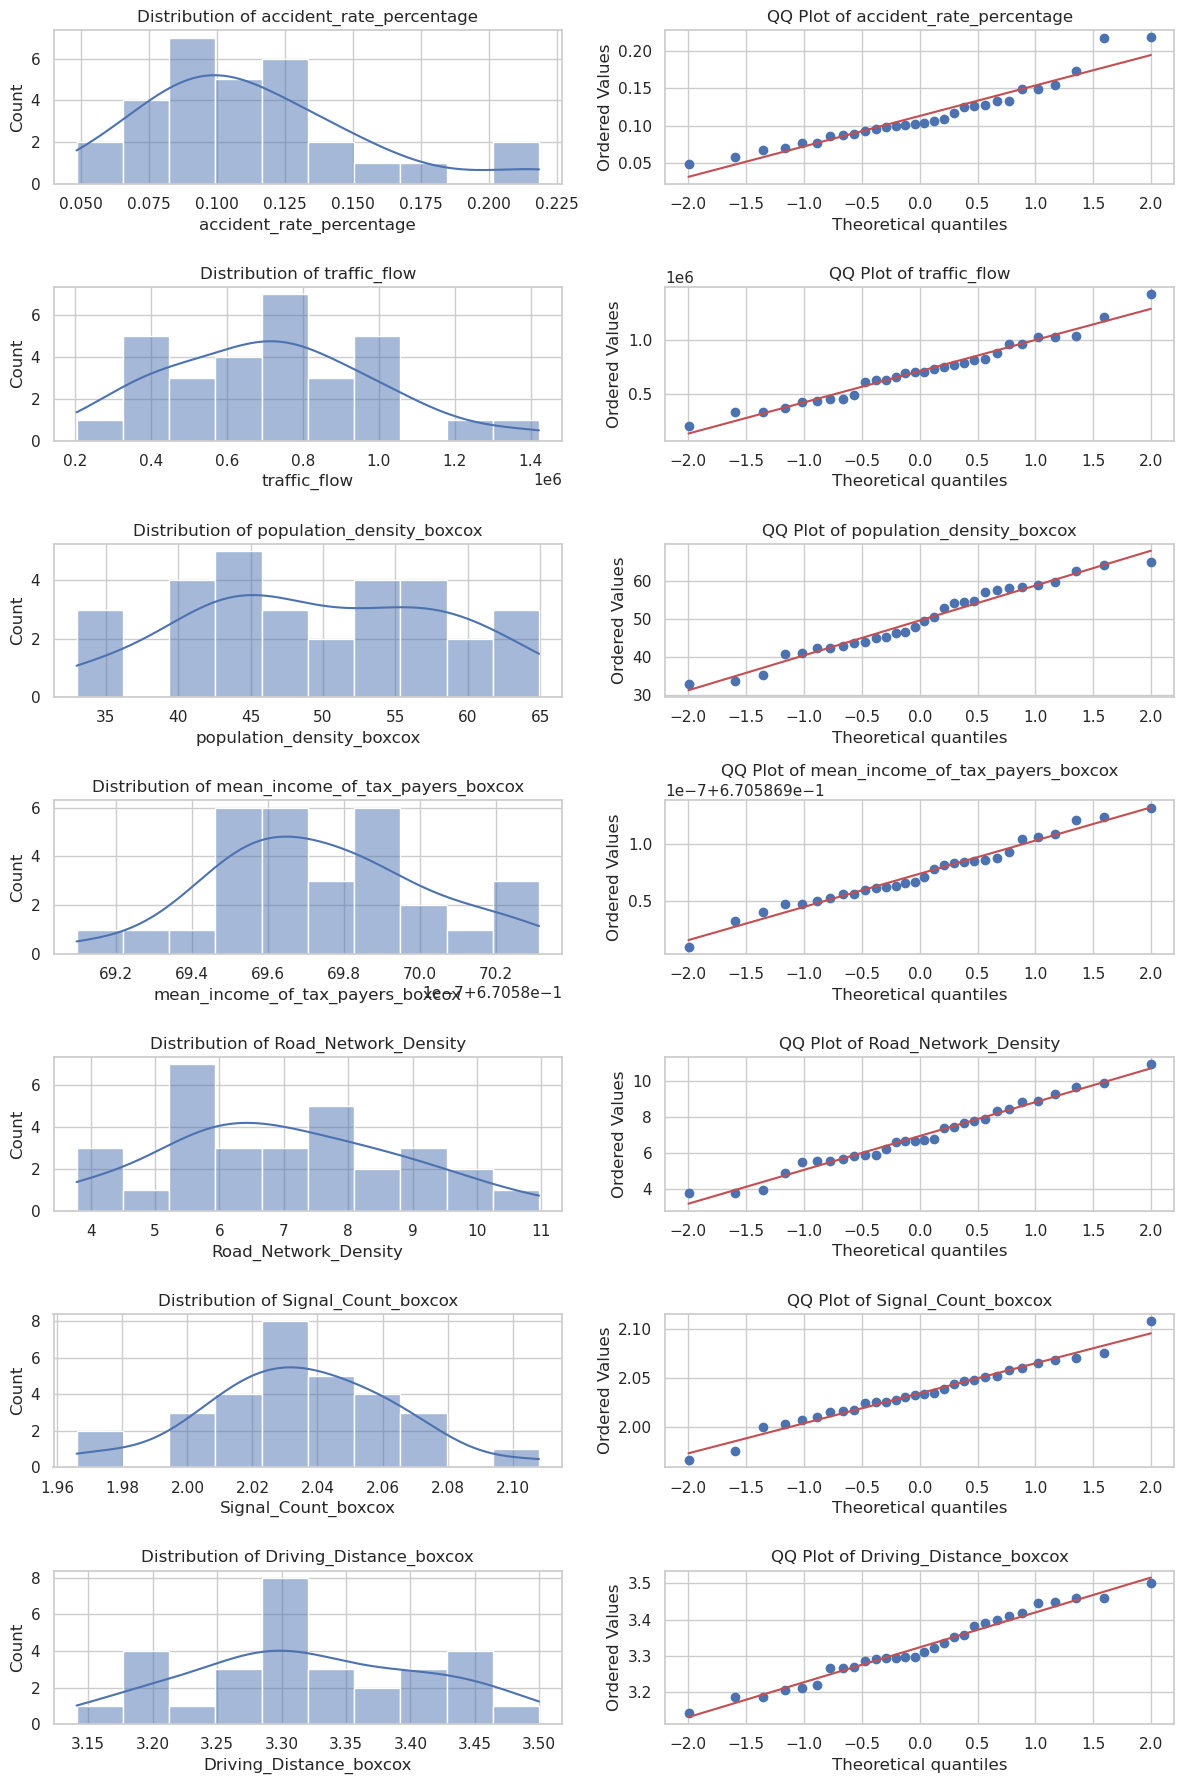

In [18]:
# 设置图形风格
sns.set(style="whitegrid")

# 设置图的大小
plt.figure(figsize=(12, 18))  # 增大高度以便显示所有7个变量

# 绘制各个变量的直方图和QQ图
variables = ['accident_rate_percentage', 'traffic_flow', 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox', 'Road_Network_Density', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 循环绘制直方图和QQ图
for i, var in enumerate(variables, 1):
    plt.subplot(7, 2, 2*i - 1)  # 绘制每个变量的直方图
    sns.histplot(df_unique[var].dropna(), kde=True, bins=10)
    plt.title(f'Distribution of {var}')
    
    plt.subplot(7, 2, 2*i)  # 绘制每个变量的QQ图
    stats.probplot(df_unique[var].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}')

# 调整布局
plt.tight_layout()
plt.show()

In [19]:
import scipy.stats as stats

# 列出需要检验的变量
variables = ['accident_rate_percentage', 'traffic_flow', 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox', 'Road_Network_Density', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 对每个变量进行Shapiro-Wilk检验
for var in variables:
    # 对数据进行Shapiro-Wilk检验
    stat, p_value = stats.shapiro(df_unique[var].dropna())
    
    # 打印检验结果
    print(f"{var} - Shapiro-Wilk检验统计量: {stat:.4f}, p值: {p_value:.4f}")
    
    # 检查p值，判断是否符合正态分布
    if p_value > 0.05:
        print(f"{var} 数据符合正态分布 (不能拒绝原假设)\n")
    else:
        print(f"{var} 数据不符合正态分布 (拒绝原假设)\n")

accident_rate_percentage - Shapiro-Wilk检验统计量: 0.9242, p值: 0.0345
accident_rate_percentage 数据不符合正态分布 (拒绝原假设)

traffic_flow - Shapiro-Wilk检验统计量: 0.9773, p值: 0.7490
traffic_flow 数据符合正态分布 (不能拒绝原假设)

population_density_boxcox - Shapiro-Wilk检验统计量: 0.9636, p值: 0.3818
population_density_boxcox 数据符合正态分布 (不能拒绝原假设)

mean_income_of_tax_payers_boxcox - Shapiro-Wilk检验统计量: 0.9812, p值: 0.8575
mean_income_of_tax_payers_boxcox 数据符合正态分布 (不能拒绝原假设)

Road_Network_Density - Shapiro-Wilk检验统计量: 0.9775, p值: 0.7555
Road_Network_Density 数据符合正态分布 (不能拒绝原假设)

Signal_Count_boxcox - Shapiro-Wilk检验统计量: 0.9862, p值: 0.9553
Signal_Count_boxcox 数据符合正态分布 (不能拒绝原假设)

Driving_Distance_boxcox - Shapiro-Wilk检验统计量: 0.9736, p值: 0.6416
Driving_Distance_boxcox 数据符合正态分布 (不能拒绝原假设)



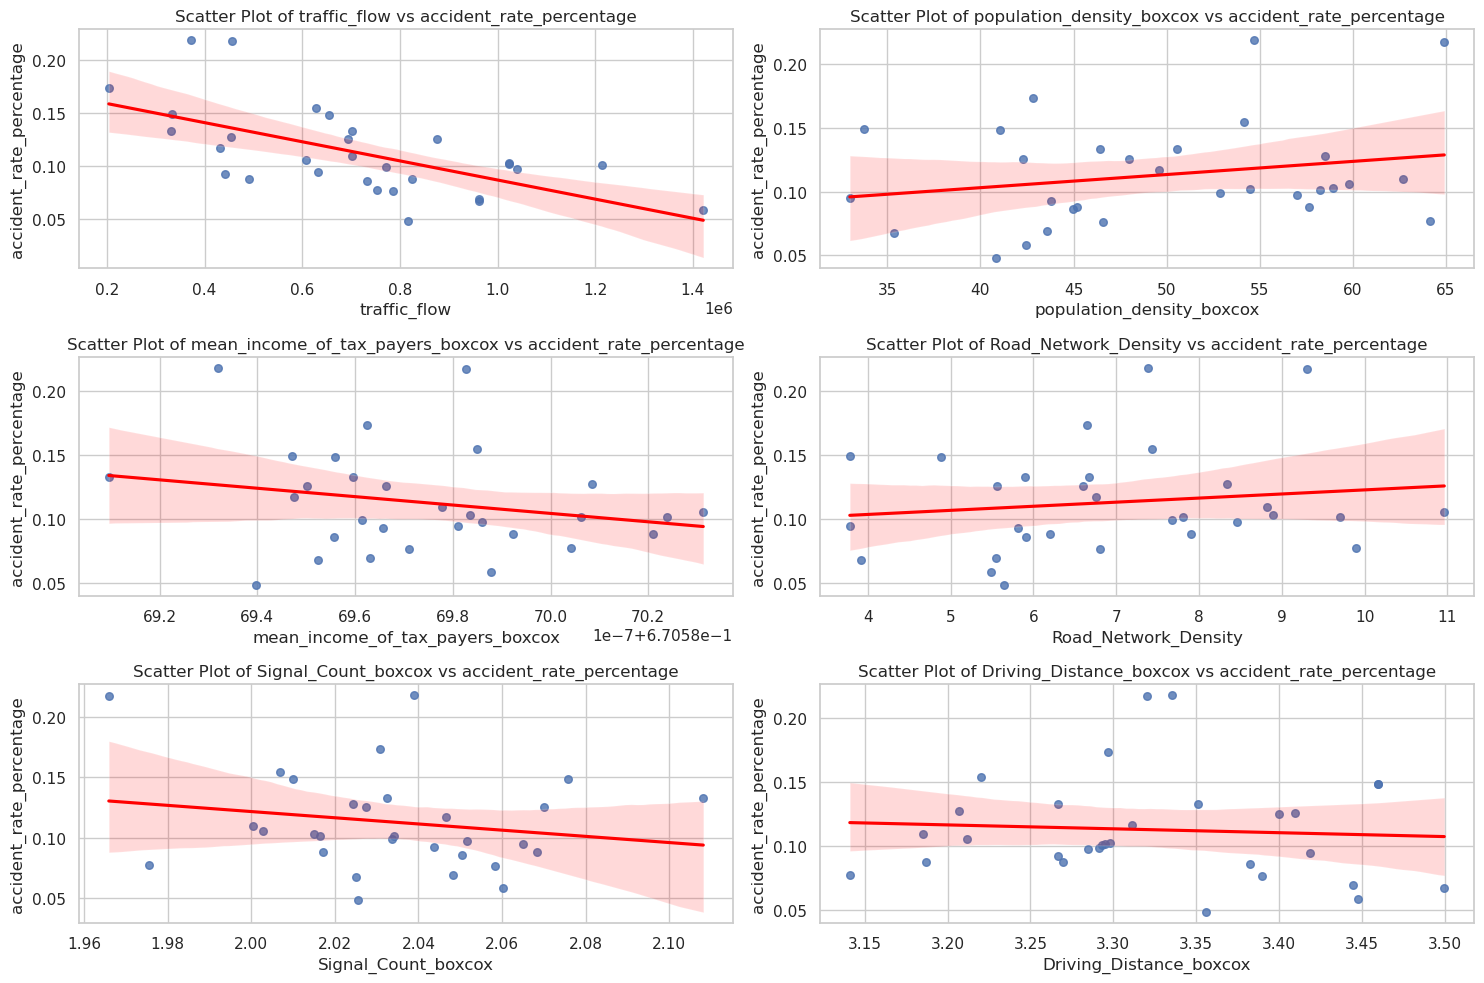

In [20]:
# 设置图形风格
sns.set(style="whitegrid")

# 创建一个大的图形，以便绘制多个子图
plt.figure(figsize=(15, 10))

# 自变量列表
variables = ['traffic_flow', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
             'Road_Network_Density', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 循环绘制每个自变量与因变量的散点图和拟合线
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)  # 2行3列布局
    sns.regplot(x=var, y='accident_rate_percentage', data=df_unique, scatter_kws={'s': 30}, line_kws={"color": "red"})
    plt.title(f'Scatter Plot of {var} vs accident_rate_percentage')
    
# 调整布局
plt.tight_layout()
plt.show()

In [21]:
df = df_unique[['accident_rate_percentage','traffic_flow', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
             'Road_Network_Density', 'Signal_Count_boxcox', 'Driving_Distance_boxcox'] ]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 21653
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   accident_rate_percentage          30 non-null     float64
 1   traffic_flow                      30 non-null     int64  
 2   population_density_boxcox         30 non-null     float64
 3   mean_income_of_tax_payers_boxcox  30 non-null     float64
 4   Road_Network_Density              30 non-null     float64
 5   Signal_Count_boxcox               30 non-null     float64
 6   Driving_Distance_boxcox           30 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.9 KB


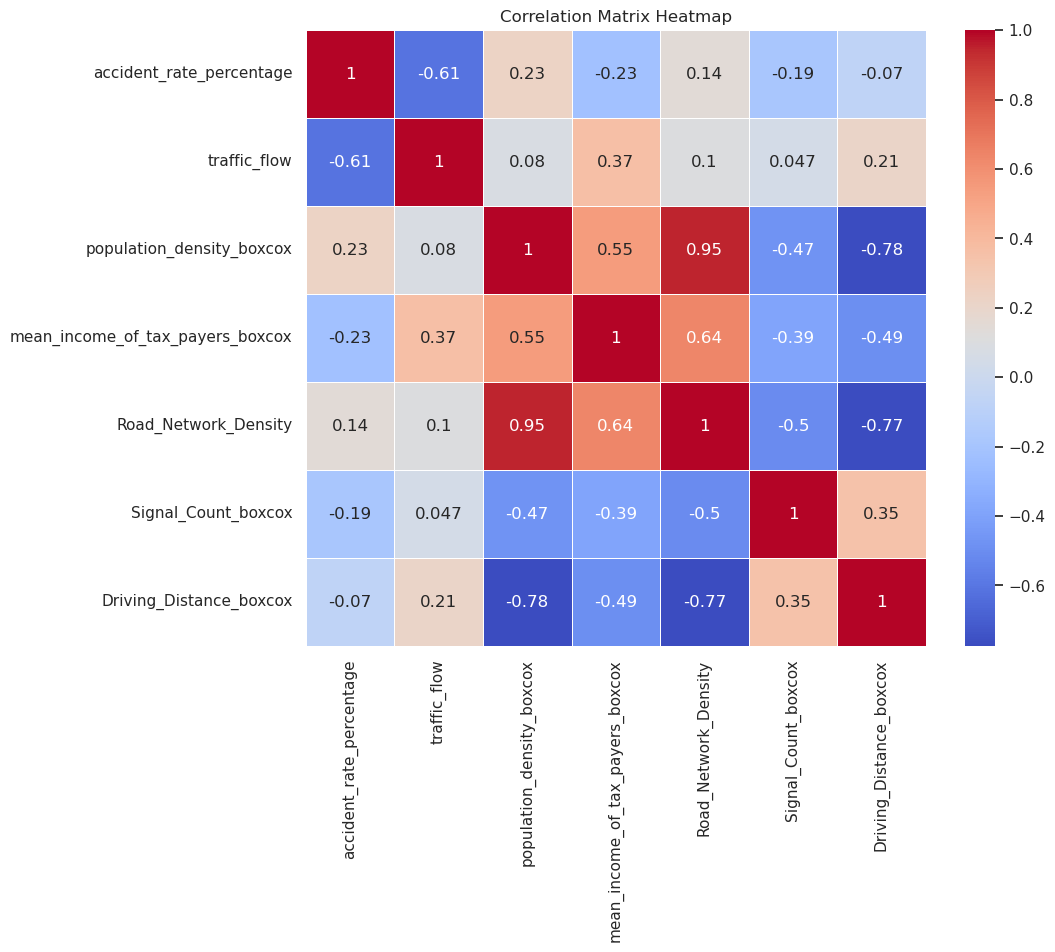

In [22]:
correlation_matrix = df.corr()
# 绘制相关性矩阵的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [23]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 选择需要计算VIF的自变量（去掉因变量 accident_rate_percentage）
variables = ['traffic_flow', 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox', 'Road_Network_Density', 
             'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 从df中选择自变量数据
X = df[variables]

# 为计算VIF添加常数列（截距项）
X_with_const = add_constant(X)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 打印VIF结果
print(vif_data)

                           Variable           VIF
0                             const  1.501200e+15
1                      traffic_flow  1.784441e+00
2         population_density_boxcox  1.231333e+01
3  mean_income_of_tax_payers_boxcox  2.443904e+00
4              Road_Network_Density  1.360823e+01
5               Signal_Count_boxcox  1.458405e+00
6           Driving_Distance_boxcox  3.759063e+00


In [24]:
import statsmodels.api as sm

# 准备因变量和自变量
y = df['accident_rate_percentage']
X = df[['traffic_flow', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
        'Road_Network_Density', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']]

# 在模型中加入常数项
X = sm.add_constant(X)

# 1. 当前模型的R-squared
model_full = sm.OLS(y, X).fit()
r_squared_full = model_full.rsquared
print(f"当前模型的R-squared: {r_squared_full}")

# 2. 去除 'population_density_boxcox' 后的模型
X_no_population_density = X.drop(columns=['population_density_boxcox'])
model_no_population_density = sm.OLS(y, X_no_population_density).fit()
r_squared_no_population_density = model_no_population_density.rsquared
print(f"去除 'population_density_boxcox' 后的R-squared: {r_squared_no_population_density}")

# 3. 去除 'Road_Network_Density' 后的模型
X_no_road_network_density = X.drop(columns=['Road_Network_Density'])
model_no_road_network_density = sm.OLS(y, X_no_road_network_density).fit()
r_squared_no_road_network_density = model_no_road_network_density.rsquared
print(f"去除 'Road_Network_Density' 后的R-squared: {r_squared_no_road_network_density}")

当前模型的R-squared: 0.7006038046177914
去除 'population_density_boxcox' 后的R-squared: 0.5878496881599922
去除 'Road_Network_Density' 后的R-squared: 0.6961772304847664


In [25]:
df_dropped = df.drop(columns=['Road_Network_Density'])

In [28]:
variables = ['traffic_flow', 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox',
             'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 从df中选择自变量数据
X = df[variables]

# 为计算VIF添加常数列（截距项）
X_with_const = add_constant(X)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 打印VIF结果
print(vif_data)

                           Variable           VIF
0                             const  1.286743e+15
1                      traffic_flow  1.784072e+00
2         population_density_boxcox  3.444951e+00
3  mean_income_of_tax_payers_boxcox  2.115269e+00
4               Signal_Count_boxcox  1.431999e+00
5           Driving_Distance_boxcox  3.725644e+00


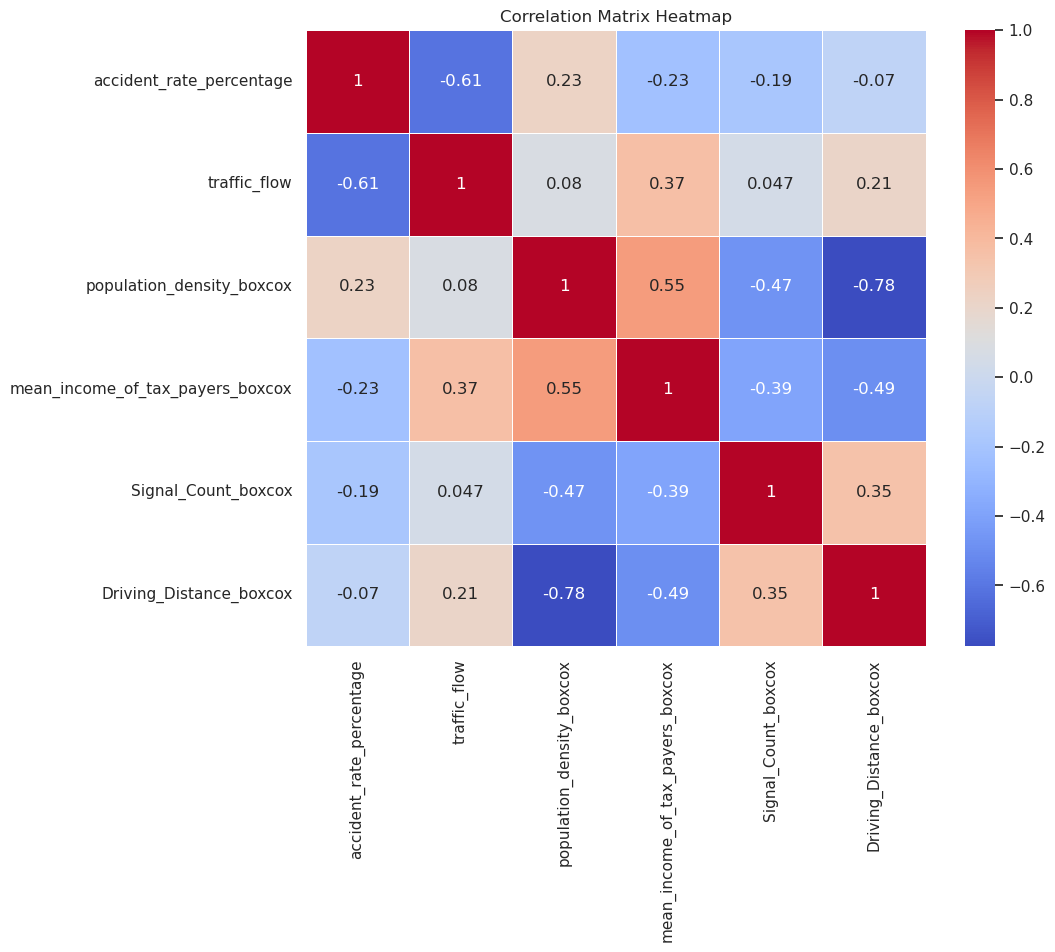

In [29]:
#去掉Road_Network_Density的热力图
correlation_matrix = df_dropped.corr()
# 绘制相关性矩阵的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

# 1. 准备自变量和因变量
y = df['accident_rate_percentage']
X = df[['traffic_flow', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
        'Road_Network_Density', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']]

# 2. 数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 使用 LassoCV 自动选择最优正则化参数
lasso_cv = LassoCV(cv=5, random_state=42)  # 5折交叉验证
lasso_cv.fit(X_train, y_train)

# 4. 输出最优的正则化参数（alpha 值）
print(f"Optimal alpha: {lasso_cv.alpha_}")

# 5. 用最优参数的 Lasso 模型进行预测
y_pred = lasso_cv.predict(X_test)

# 6. 模型评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# 7. 查看特征系数
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_cv.coef_
})
print(lasso_coefficients)


Optimal alpha: 177.3880591220717
Mean Squared Error (MSE): 0.0009088699537436153
R-squared: -0.12443285310849239
                            Feature   Coefficient
0                      traffic_flow -8.518272e-08
1         population_density_boxcox  0.000000e+00
2  mean_income_of_tax_payers_boxcox -0.000000e+00
3              Road_Network_Density  0.000000e+00
4               Signal_Count_boxcox -0.000000e+00
5           Driving_Distance_boxcox  0.000000e+00


In [36]:
#逐步回归

import statsmodels.api as sm

def forward_selection(X, y, significance_level=0.05):
    initial_features = []  # 初始特征为空
    remaining_features = list(X.columns)  # 所有待选特征
    while remaining_features:
        best_pval = float('inf')
        best_feature = None
        for feature in remaining_features:
            # 尝试将每个变量添加到模型中
            model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit()
            pval = model.pvalues[feature]
            if pval < best_pval:  # 找到 p-value 最小的变量
                best_pval = pval
                best_feature = feature
        if best_pval < significance_level:  # 如果最小的 p-value 显著
            initial_features.append(best_feature)  # 将变量加入模型
            remaining_features.remove(best_feature)  # 从候选变量中移除
        else:
            break
    return initial_features

# 应用前向选择
selected_features = forward_selection(X, y)
print("Selected features (Forward Selection):", selected_features)


def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)  # 初始包含所有变量
    while features:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        pvalues = model.pvalues.iloc[1:]  # 排除截距项的 p-value
        worst_pval = pvalues.max()  # 找到最大 p-value
        if worst_pval > significance_level:  # 如果最大 p-value 不显著
            worst_feature = pvalues.idxmax()  # 找到 p-value 最大的变量
            features.remove(worst_feature)  # 从模型中移除该变量
        else:
            break
    return features

# 应用后向消除
remaining_features = backward_elimination(X, y)
print("Remaining features (Backward Elimination):", remaining_features)

def stepwise_selection(X, y, significance_level=0.05):
    initial_features = []  # 初始特征为空
    remaining_features = list(X.columns)  # 所有待选特征
    while True:
        changed = False

        # 前向选择：尝试添加一个变量
        best_pval = float('inf')
        best_feature = None
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit()
            pval = model.pvalues[feature]
            if pval < best_pval:
                best_pval = pval
                best_feature = feature
        if best_pval < significance_level:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            changed = True

        # 后向消除：尝试移除一个变量
        model = sm.OLS(y, sm.add_constant(X[initial_features])).fit()
        pvalues = model.pvalues.iloc[1:]  # 排除截距项的 p-value
        worst_pval = pvalues.max()
        if worst_pval > significance_level:
            worst_feature = pvalues.idxmax()
            initial_features.remove(worst_feature)
            remaining_features.append(worst_feature)
            changed = True

        if not changed:  # 如果没有变化，停止迭代
            break

    return initial_features

# 应用逐步回归
final_features = stepwise_selection(X, y)
print("Final selected features (Stepwise Selection):", final_features)


Selected features (Forward Selection): ['traffic_flow']
Remaining features (Backward Elimination): ['traffic_flow', 'population_density_boxcox', 'Driving_Distance_boxcox']
Final selected features (Stepwise Selection): ['traffic_flow']
